# Несбалансированные выборки. Практическая работа

## Цель практической работы

Научиться обрабатывать несбалансированные данные и обучать модели машинного обучения на таких данных.

## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Разделить данные на обучающую и тестовую выборки.
3. Подготовить данные для моделирования.
4. Сбалансировать данные методом SMOTE и обучить модель машинного обучения.
5. Обучить модель машинного обучения с использованием весов классов и кросс-валидации.
6. Сравнить метрики качества четырёх моделей.




## Что оценивается

- Выполнены все этапы работы.
- Не допущена утечка данных при разделении выборок и подготовке данных.
- Данные корректным образом сбалансированы.
- Модели не переобучены.


## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.


# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита.
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту.



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('german_credit_data.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
df.isna().sum() / df.shape[0]

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


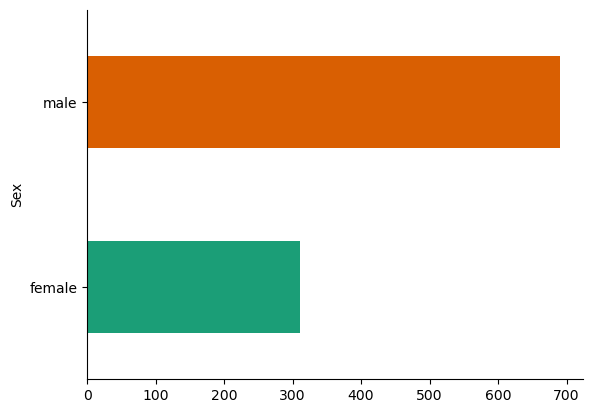

In [7]:
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

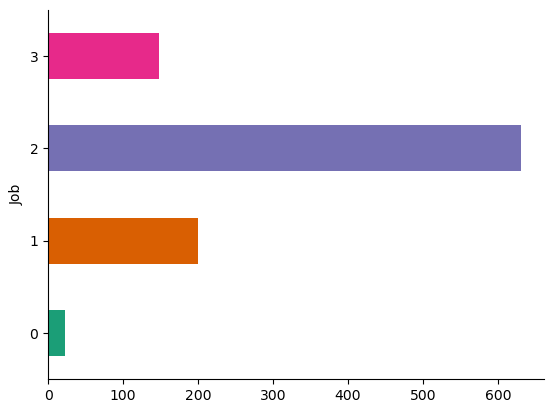

In [8]:
df.groupby('Job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

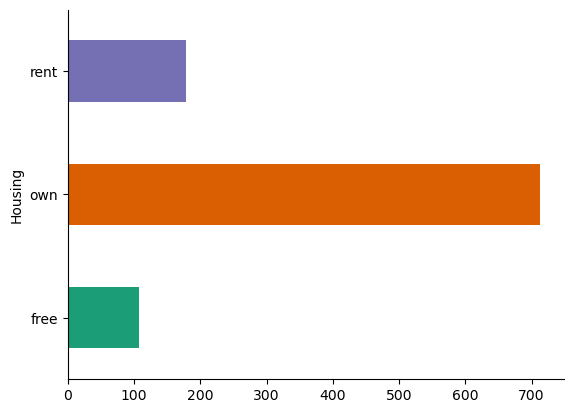

In [9]:
df.groupby('Housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

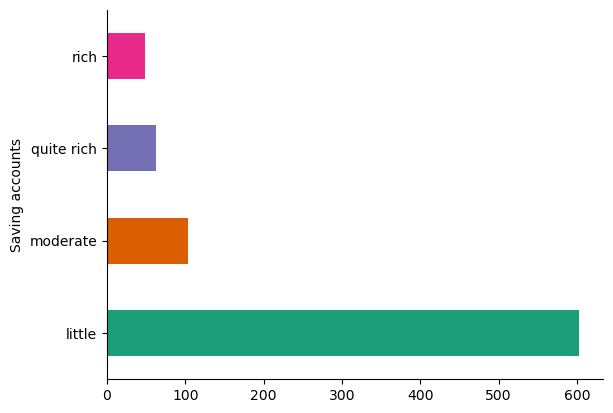

In [10]:
df.groupby('Saving accounts').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in columns:
    unique_values = df[col].unique()
    print(f"{col} ({unique_values})")
    print("\n")

Sex (['male' 'female'])


Job ([2 1 3 0])


Housing (['own' 'free' 'rent'])


Saving accounts ([nan 'little' 'quite rich' 'rich' 'moderate'])


Checking account (['little' 'moderate' nan 'rich'])


Purpose (['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others'])


Risk (['good' 'bad'])




In [12]:
# Проверим корреляцию пропущенных значений разных признаков. Корреляция очень слабая
df[['Saving accounts', 'Checking account']].isnull().corr()

,Saving accounts,Checking account
Saving accounts,1.000000,0.142364
Checking account,0.142364,1.000000


1. Пропущенные значения находятся в категориальных признаках Saving accounts и Checking account. Процент пропущенных значений Saving accounts = 18,3%, Checking account = 39,4%.

Преобразование категориальных переменных в числовые.

In [13]:
df['Sex'].replace(['male','female'],
[0,1],inplace = True)

In [14]:
df['Checking account'].replace(['little', 'moderate', 'rich'],
[0,1,2],inplace = True)

In [15]:
df['Saving accounts'].replace(['little', 'moderate', 'rich', 'quite rich'],
[0,1,2,3],inplace = True)

In [16]:
df['Risk'].replace(['bad','good'],
[0,1],inplace = True)

In [17]:
df['Housing'].replace(['free', 'rent', 'own'],
[0,1,2],inplace = True)

In [18]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,2,NaN,0.0,1169,6,radio/TV,1
1,22,1,2,2,0.0,1.0,5951,48,radio/TV,0
2,49,0,1,2,0.0,NaN,2096,12,education,1
3,45,0,2,0,0.0,0.0,7882,42,furniture/equipment,1
4,53,0,2,0,0.0,0.0,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,2,0.0,NaN,1736,12,furniture/equipment,1
996,40,0,3,2,0.0,0.0,3857,30,car,1
997,38,0,2,2,0.0,NaN,804,12,radio/TV,1
998,23,0,2,0,0.0,0.0,1845,45,radio/TV,0


Заполнение пропущенных значений для в признаках Saving accounts и Checking account с использованием метода MICE (multivariate Imputation of Chained Equations).

In [19]:
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=1),
    max_iter=10,
    random_state=1)

num_columns = ['Age', 'Job', 'Housing',	'Saving accounts', 'Checking account',	'Credit amount', 'Duration']

In [20]:
df[num_columns] = imputer.fit_transform(df[num_columns])

In [21]:
df['Saving accounts'].round(0).head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    2.0
6    3.0
7    0.0
8    2.0
9    0.0
Name: Saving accounts, dtype: float64

In [22]:
df['Checking account'].round(0).head(10)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Checking account, dtype: float64

In [23]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   int64  
 2   Job               1000 non-null   float64
 3   Housing           1000 non-null   float64
 4   Saving accounts   1000 non-null   float64
 5   Checking account  1000 non-null   float64
 6   Credit amount     1000 non-null   float64
 7   Duration          1000 non-null   float64
 8   Purpose           1000 non-null   object 
 9   Risk              1000 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 78.3+ KB


In [25]:
# Выбираем столбцы с числами с плавающей точкой
float_cols = df.select_dtypes(include=['float64']).columns
# Преобразуем эти столбцы к целочисленному типу
df[float_cols] = df[float_cols].applymap(np.int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   int64 
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   int64 
 4   Saving accounts   1000 non-null   int64 
 5   Checking account  1000 non-null   int64 
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.3+ KB


In [27]:
df.head(15)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,2,0,0,1169,6,radio/TV,1
1,22,1,2,2,0,1,5951,48,radio/TV,0
2,49,0,1,2,0,0,2096,12,education,1
3,45,0,2,0,0,0,7882,42,furniture/equipment,1
4,53,0,2,0,0,0,4870,24,car,0
5,35,0,1,0,1,1,9055,36,education,1
6,53,0,2,2,3,1,2835,24,furniture/equipment,1
7,35,0,3,1,0,1,6948,36,car,1
8,61,0,1,2,2,0,3059,12,radio/TV,1
9,28,0,3,2,0,1,5234,30,car,0


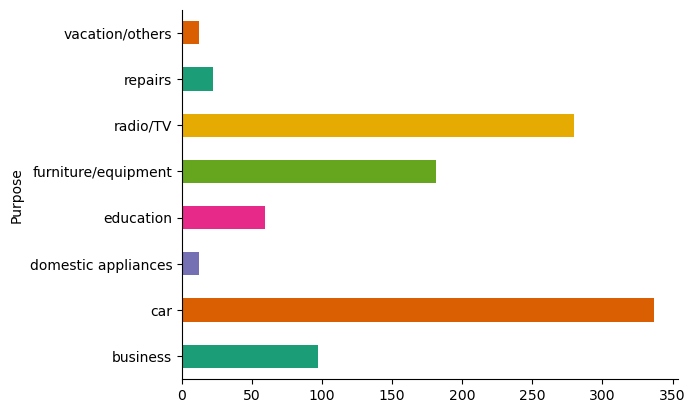

In [28]:
df.groupby('Purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Объеденим категории в признаке Purpose в три группы:
- Кредит для покупки машины. Оставим значение "car";
- Кредит для покупки товаров для дома - "household_products". В эту группу войдут  
  значения  "radio/TV", "domestic appliance" и "furniture/equipment";
- Кредит на другие цели - "other". В эту группу войдут значения "education",
  "business", "repairs" и "vacation/others".


In [29]:
cleanup_nums = {"Purpose": {"radio/TV": "household_products", "domestic appliances": "household_products",
                            "furniture/equipment": "household_products", "education": "other", "business": "other",
                            "repairs": "other", "vacation/others": "other"
}}

In [30]:
df = df.replace(cleanup_nums)

In [31]:
df.Purpose.unique()

array(['household_products', 'other', 'car'], dtype=object)

In [32]:
# Проверим распределение в долях значений в целевой переменной - Risk, допустил ли заёмщик просрочку платежей по кредиту
global_mean = df.Risk.mean()
round(global_mean, 3)

0.7

Создадим список катигориальных переменных

In [33]:
categorical = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

In [34]:
for col in categorical:
    df_group = df.groupby(by=col).Risk.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
Sex,,,
0,0.723188,0.023188,1.033126
1,0.648387,-0.051613,0.926267


,mean,diff,risk
Job,,,
0,0.681818,-0.018182,0.974026
1,0.720000,0.020000,1.028571
2,0.704762,0.004762,1.006803
3,0.655405,-0.044595,0.936293


,mean,diff,risk
Housing,,,
0,0.592593,-0.107407,0.846561
1,0.608939,-0.091061,0.869912
2,0.739130,0.039130,1.055901


,mean,diff,risk
Saving accounts,,,
0,0.665295,-0.034705,0.950421
1,0.748344,0.048344,1.069063
2,0.877193,0.177193,1.253133
3,0.825397,0.125397,1.179138


,mean,diff,risk
Checking account,,,
0,0.690778,-0.009222,0.986825
1,0.700521,0.000521,1.000744
2,0.777778,0.077778,1.111111


,mean,diff,risk
Purpose,,,
car,0.685460,-0.014540,0.979228
household_products,0.737844,0.037844,1.054062
other,0.631579,-0.068421,0.902256


Выводы:
Так как мы исследуем данные по кредитному риску, то незначительные откланения от глобальных данных здесь могут влиять на доход или убытки в существенных суммах денежных средств.

1. Признак пол(Sex):
- У женщины риск просрочки по кредиту на 10% выше чем у мужчин.
2. Признак квалификация(Job):
- Больше всего риск просрочки у работников с кодом 1;
- Меньше всего у работников с кодом 3.
3. Признак тип жилья(Housing):
- Больше всего риск просрочки у заемщиков собственников жилья(own - код 3);
- Меньше всего риск просрочки у заемщиков с бесплатным(социальным жильём)(free - код 0).
3. Признак объём средств на сберегательных счетах заёмщика(Saving accounts):
- Больше всего риск просрочки у заемщиков с большим объёмом средств(rich - код 2);
- Меньше всего риск просрочки у заемщиков с небольшим объёмом средств(little - код 0).
4. Признак объём средств на основном счёте заёмщика(Checking account):
- Больше всего риск просрочки у заемщиков с большим объёмом средств(rich - код 2);
- Меньше всего риск просрочки у заемщиков с небольшим объёмом средств(little - код 0).

In [35]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # скрипка
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

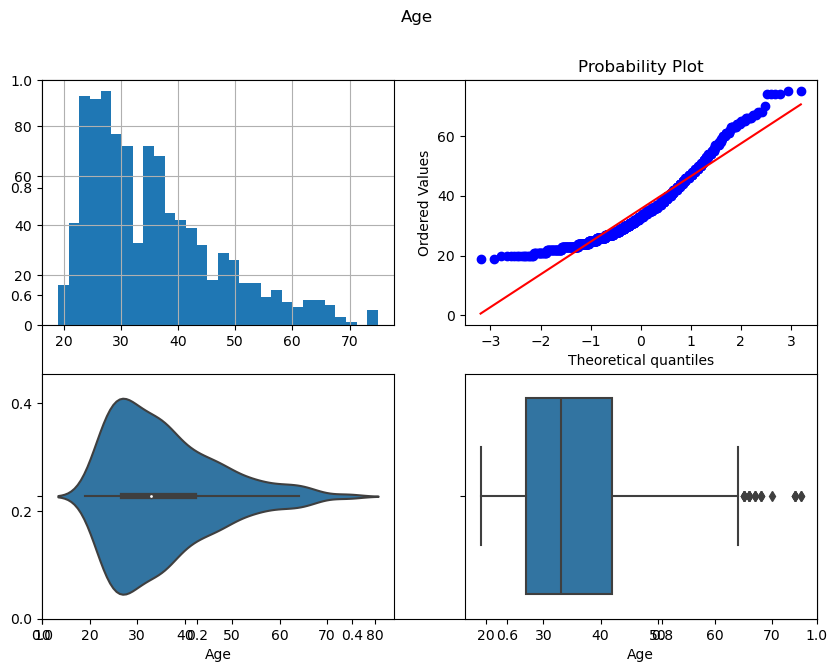

In [36]:
diagnostic_plots(df, 'Age', 'Age')

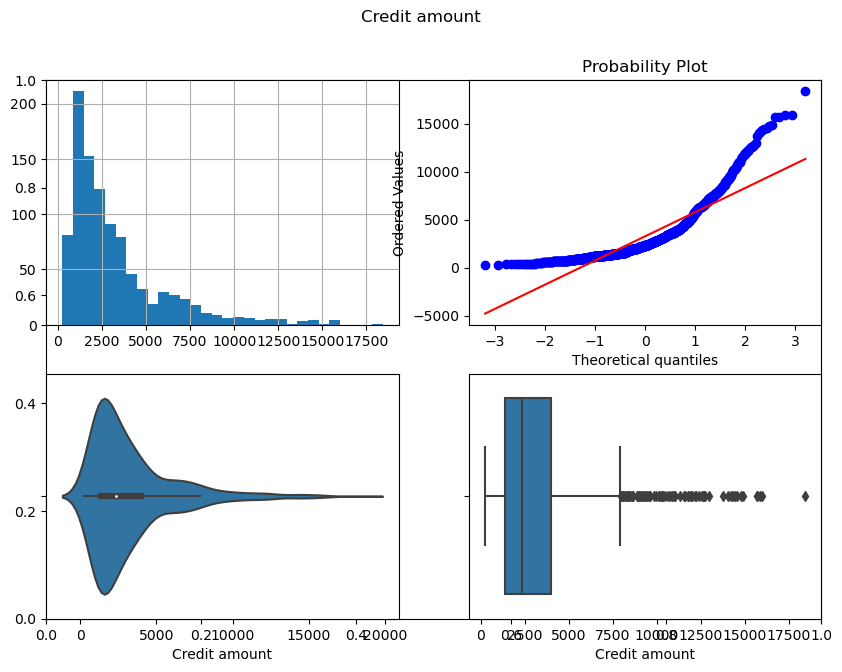

In [37]:
diagnostic_plots(df, 'Credit amount', 'Credit amount')

Линейный график для двумерного анализа зависимости:
- суммы кредита (Credit amount) от возраста (Age) и срок кредита в месяцах (Duration);
- срока кредита в месяцах (Duration) от от возраста (Age).

<Axes: xlabel='Duration', ylabel='Credit amount'>

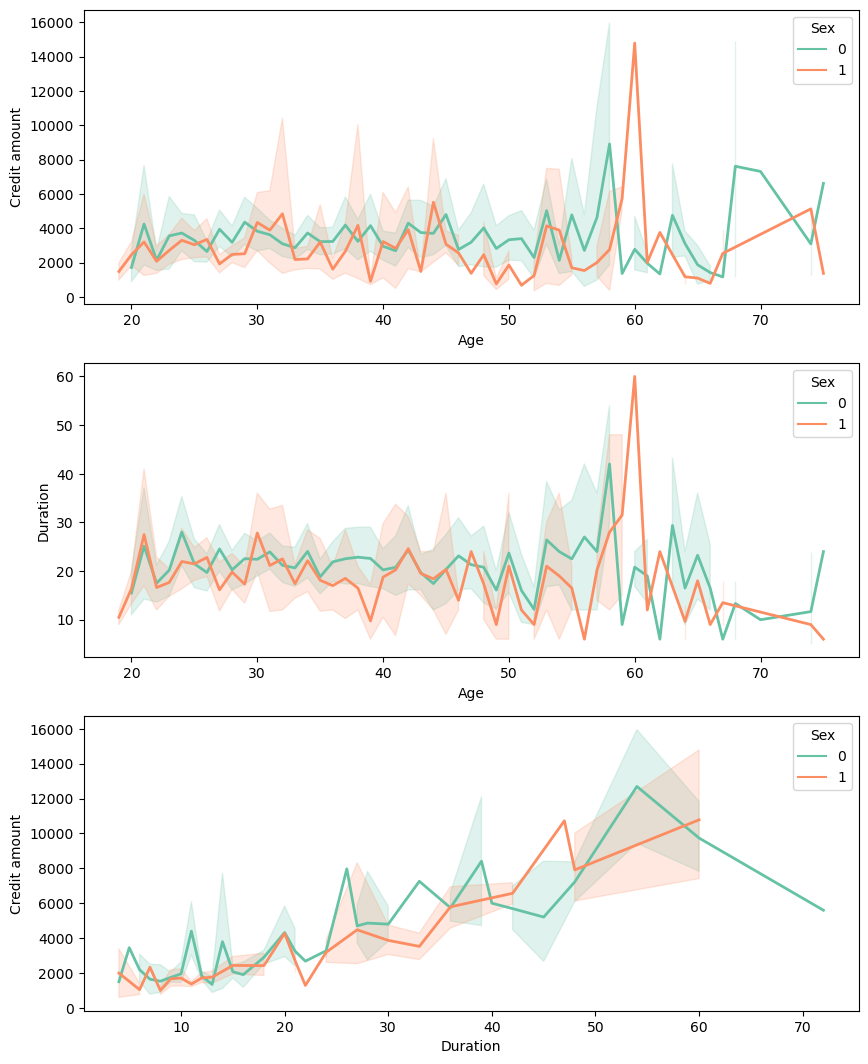

In [38]:
fig, ax = plt.subplots(3,1,figsize=(10,13))


sns.lineplot(data=df, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0], palette='Set2')
sns.lineplot(data=df, x='Age', y='Duration', hue='Sex', lw=2, ax=ax[1], palette='Set2')
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[2],  palette='Set2')

Запишем очищенный от пропусков файл для дальнейшей работы

In [39]:
df.to_csv('german_credit.csv', index = False)

# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [40]:
df_new = pd.read_csv('german_credit.csv')
df_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,2,0,0,1169,6,household_products,1
1,22,1,2,2,0,1,5951,48,household_products,0
2,49,0,1,2,0,0,2096,12,other,1
3,45,0,2,0,0,0,7882,42,household_products,1
4,53,0,2,0,0,0,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,2,0,0,1736,12,household_products,1
996,40,0,3,2,0,0,3857,30,car,1
997,38,0,2,2,0,0,804,12,household_products,1
998,23,0,2,0,0,0,1845,45,household_products,0


In [41]:
# Преобразование  категориальной переменной
dummies = pd.get_dummies(df_new['Purpose']).astype(int)
dummies

,car,household_products,other
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
995,0,1,0
996,1,0,0
997,0,1,0
998,0,1,0


In [42]:
# Присоединение фиктивных переменных к исходному DataFrame
df_new = pd.concat([df_new, dummies], axis=1)
df_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,car,household_products,other
0,67,0,2,2,0,0,1169,6,household_products,1,0,1,0
1,22,1,2,2,0,1,5951,48,household_products,0,0,1,0
2,49,0,1,2,0,0,2096,12,other,1,0,0,1
3,45,0,2,0,0,0,7882,42,household_products,1,0,1,0
4,53,0,2,0,0,0,4870,24,car,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,2,0,0,1736,12,household_products,1,0,1,0
996,40,0,3,2,0,0,3857,30,car,1,1,0,0
997,38,0,2,2,0,0,804,12,household_products,1,0,1,0
998,23,0,2,0,0,0,1845,45,household_products,0,0,1,0


In [43]:
## Удаление исходных признака Purpose
df_new = df_new.drop(['Purpose'], axis=1)
df_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,household_products,other
0,67,0,2,2,0,0,1169,6,1,0,1,0
1,22,1,2,2,0,1,5951,48,0,0,1,0
2,49,0,1,2,0,0,2096,12,1,0,0,1
3,45,0,2,0,0,0,7882,42,1,0,1,0
4,53,0,2,0,0,0,4870,24,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,2,0,0,1736,12,1,0,1,0
996,40,0,3,2,0,0,3857,30,1,1,0,0
997,38,0,2,2,0,0,804,12,1,0,1,0
998,23,0,2,0,0,0,1845,45,0,0,1,0


In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1000 non-null   int64
 1   Sex                 1000 non-null   int64
 2   Job                 1000 non-null   int64
 3   Housing             1000 non-null   int64
 4   Saving accounts     1000 non-null   int64
 5   Checking account    1000 non-null   int64
 6   Credit amount       1000 non-null   int64
 7   Duration            1000 non-null   int64
 8   Risk                1000 non-null   int64
 9   car                 1000 non-null   int32
 10  household_products  1000 non-null   int32
 11  other               1000 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 82.2 KB


<Axes: >

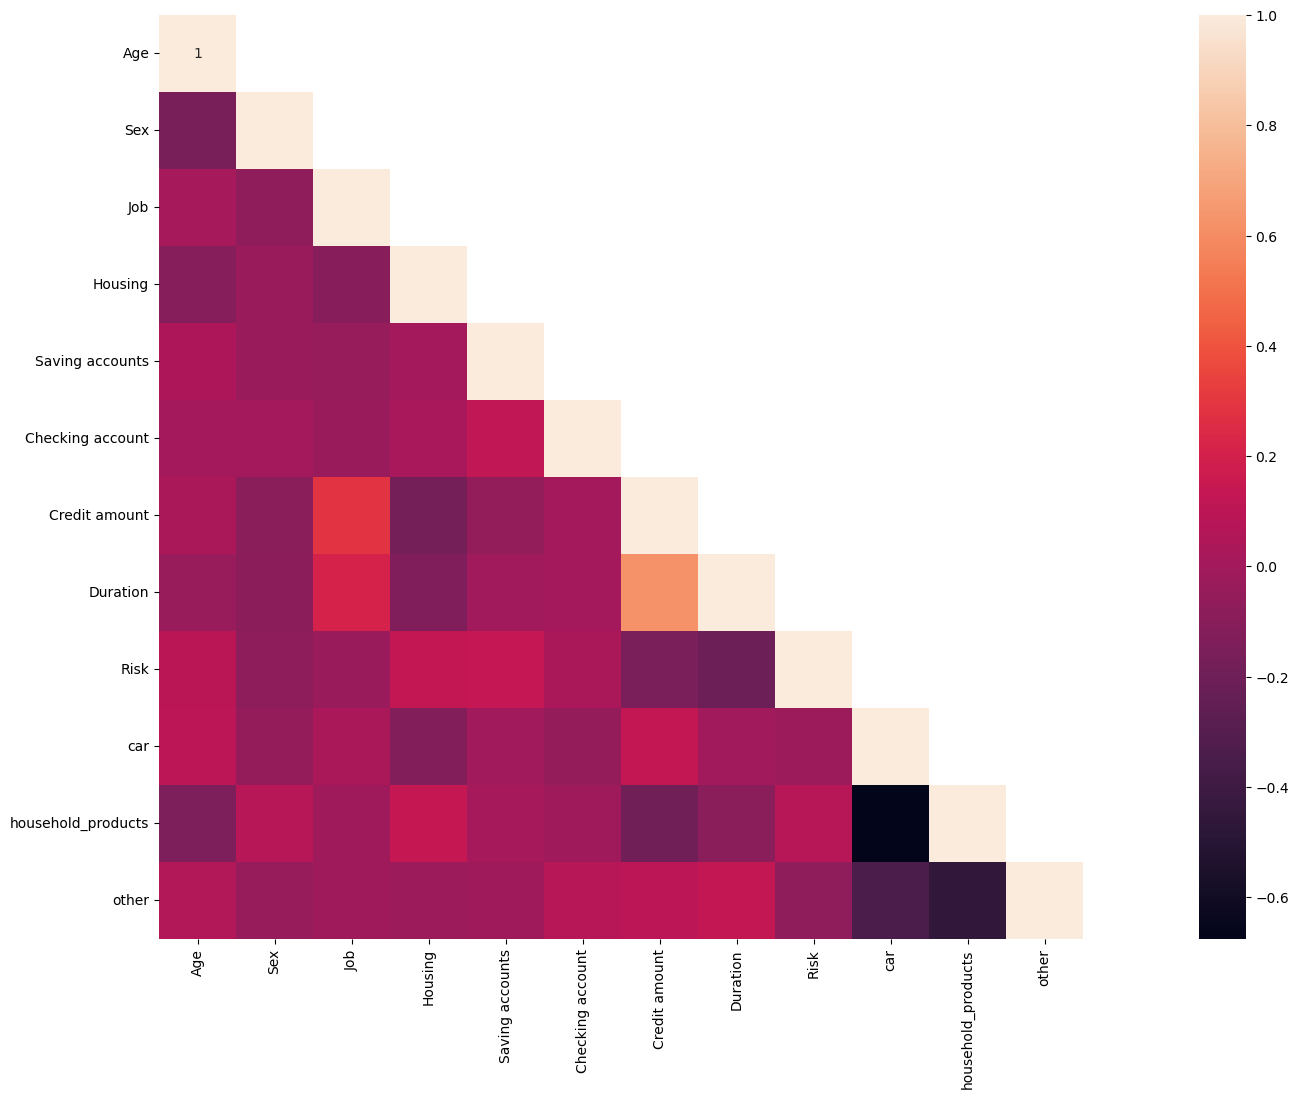

In [45]:
# Использование карты корреляции для визуализации признаков с высокой корреляцией
cor_mat= df_new.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [46]:
X = df_new.drop("Risk", axis=1)
y = df_new["Risk"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1)

# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

Очистка и подготовка проведена в Задании 1

# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

Обучим модель RandomForestClassifier на несбалонсированных данных для дальнейшего сравнения.

In [47]:
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=1)
model.fit(Xtrain, ytrain)

y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

In [48]:
print('Точность для обучающей выборки:', model.score(Xtrain, ytrain))
print('Точность для тестовой выборки:', model.score(Xtest, ytest))

Точность для обучающей выборки: 0.7275
Точность для тестовой выборки: 0.705


In [49]:
pred_forest = model.predict_proba(Xtest)[:, 1]

In [50]:
roc_auc_score(ytest, pred_forest)

0.6722023809523809

In [76]:
!pip install imbalanced-learn
!pip install SMOTE

  Using cached smote-0.1-py2.py3-none-any.whl.metadata (278 bytes)
Using cached smote-0.1-py2.py3-none-any.whl (3.3 kB)


In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=1, k_neighbors=2)
X_train, y_train = os.fit_resample(X, y)

In [ ]:
y_train.value_counts()

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=1)
model.fit(X_train, y_train)

print(roc_auc_score(ytest, model.predict_proba(Xtest)[:, 1]))

Метод SMOTE улучшил качество модели.  ROC-AUC увеличился с 0,67 до 0,71

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
rfc=RandomForestClassifier(random_state=1)

In [71]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Set up score
scoring = ['roc_auc']

In [72]:
grid_search =GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='roc_auc',
                           n_jobs=-1,
                           cv=5,
                           verbose=True)

grid_result = grid_search.fit(X_train, y_train)

print("подбор гиперпараметров :(лучшие параметры) ", grid_result.best_params_)
print("roc-auc :", grid_result.best_score_)

NameError: name 'X_train' is not defined

In [ ]:
rfc1 = RandomForestClassifier(max_features='sqrt',
                              n_estimators= 500,
                              max_depth=8,
                              criterion='gini',
                              random_state=1)

rfc1.fit(X_train, y_train)

print(roc_auc_score(ytest, rfc1.predict_proba(Xtest)[:, 1]))

# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

В приведенном коде мы используем библиотеку Scikit-learn для вычисления весов классов с помощью compute_class_weight. Параметр 'balanced' автоматически вычисляет веса классов на основе их доли в данных. Затем мы передаем эти веса в нашу модель случайного леса, что позволяет учесть дисбаланс классов.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=ytrain)

In [ ]:
model_forest_class = RandomForestClassifier(class_weight=dict(enumerate(class_weights)), random_state=1)

model_forest_class.fit(Xtrain, ytrain)

print(roc_auc_score(ytest, model_forest_class.predict_proba(Xtest)[:, 1]))

In [ ]:
grid_search =GridSearchCV(estimator=model_forest_class,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='roc_auc',
                           n_jobs=-1,
                           cv=5,
                           verbose=True)

grid_result = grid_search.fit(Xtrain, ytrain)

print("подбор гиперпараметров :(лучшие параметры) ", grid_result.best_params_)
print("roc-auc :", grid_result.best_score_)

In [ ]:
model_forest_class1 = RandomForestClassifier(class_weight=dict(enumerate(class_weights),
                                                               max_features='sqrt',
                                                               n_estimators= 500,
                                                               max_depth=5,
                                                               criterion='gini',
                                                               random_state=1))

model_forest_class1.fit(Xtrain, ytrain)

print(roc_auc_score(ytest, model_forest_class1.predict_proba(Xtest)[:, 1]))

Выводы:
 - Лучший вариант показала модель SMOTE c подобранными гиперпараметрами ROC-AUC = 0.95

 Недостатки SMOTE:
- Генерируются синтетические данные, которых не было в исходной выборке.
- Метод используется только для числовых признаков.